<a href="https://colab.research.google.com/github/Jessvcv/Statistical-Modeling-HW/blob/main/Tran_HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import scale
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:
url = 'https://raw.githubusercontent.com/CDavisBelmont/illustris3_135/main/illustris_3_135.txt'

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,Unnamed: 0,HaloMass,BHMdot,X,Y,Z,Metallicity,HalfMassRadius,MassInsideR,GasMass,...,StellarMass,BHMass,SFR,Bmags,Vmags,Vx,Vy,Vz,Vdisp,Vmax
0,0,25250.072266,5.566476e-02,877.298401,26328.457031,18063.642578,0.006348,675.577637,579.321655,3067.290283,...,161.944351,6.007357,4.110980,-24.060764,-24.916460,29.411531,-224.630814,-55.425617,543.771362,896.852722
1,1,2467.932617,1.223092e-02,178.518204,24557.099609,16858.667969,0.060057,336.548523,43.003906,40.264423,...,33.024204,0.568700,1.875222,-22.449539,-23.301014,66.662254,591.170898,526.386475,262.068909,399.266846
2,2,406.136597,1.453577e-10,824.482971,26747.820312,17363.753906,0.027007,57.244503,42.366669,0.771304,...,18.825663,0.864502,0.344028,-21.533604,-22.424526,234.653381,-627.628113,914.269287,243.379089,393.619568
3,3,310.241333,1.163913e-02,1490.340088,26515.580078,19381.523438,0.030900,77.945251,17.118464,4.487493,...,11.308866,0.137719,4.040843,-21.656534,-22.374006,-37.424828,-824.608215,-1105.880615,172.938065,306.698425
4,4,273.695526,2.036894e-03,836.917236,26543.775391,15552.161133,0.059504,88.328186,14.066399,1.576261,...,10.226140,0.092305,2.923257,-21.719875,-22.317812,-494.386871,38.017307,610.985535,152.520920,309.767639


In [ ]:
df = df.drop(columns = ['Unnamed: 0'])

# Q5. (1 point)
Scale your data and fit your PCA model to the scaled data.

In [ ]:
# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Fit PCA model
pca = PCA()
pca.fit(df_scaled)

PCA()

# Q6. (1 point)
Create a scatter plot of PC1 on the x-axis and PC2 on the y-axis

Text(0, 0.5, 'Principal Component 2')

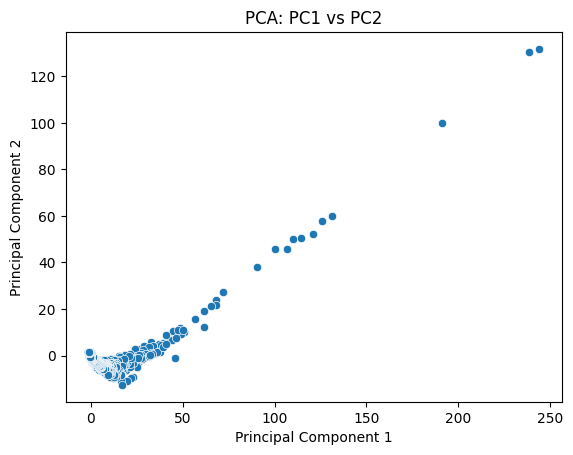

In [ ]:
# Transform the scaled data into principal components
pca_data = pca.transform(df_scaled)

# Create a DataFrame for the first two principal components
pca_df = pd.DataFrame({
    'PC1': pca_data[:, 0],
    'PC2': pca_data[:, 1]
})

# Scatter plot of PC1 vs PC2
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA: PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


# Q7. (1 point)
Create a scree plot which shows variance explained by each additional principal component.
Also create a plot which shows the cumulative explained variance.

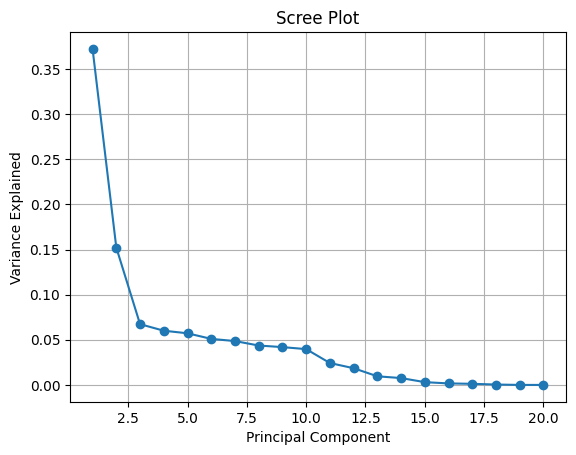

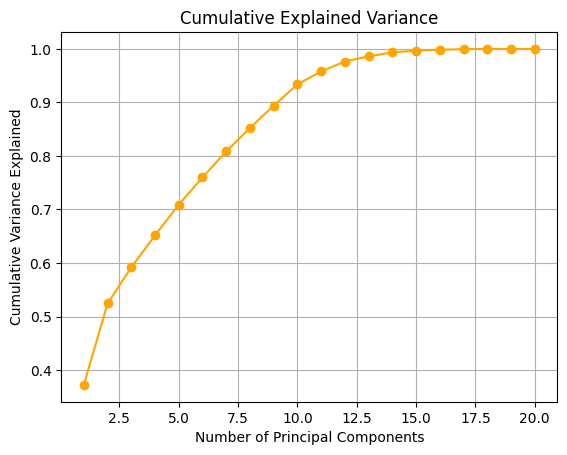

In [ ]:
# Get the explained variance ratios
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# Create a scree plot
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

# Create a cumulative variance plot
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o', color='orange')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()


# Q8. (1 point)
Create 2 bar charts which show the magnitude of coefficients for PC1 and PC2 respectively the original features. This shows which features were included in each principal component. Which features were important and which were unimportant?

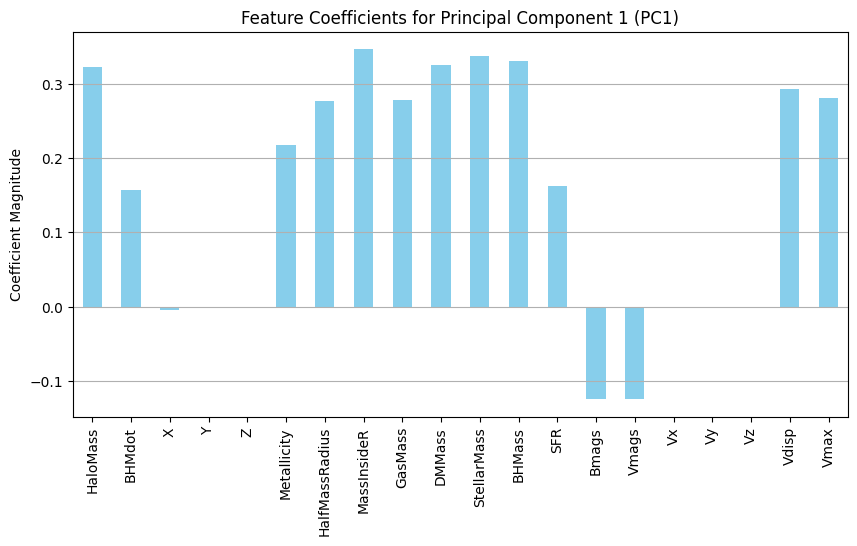

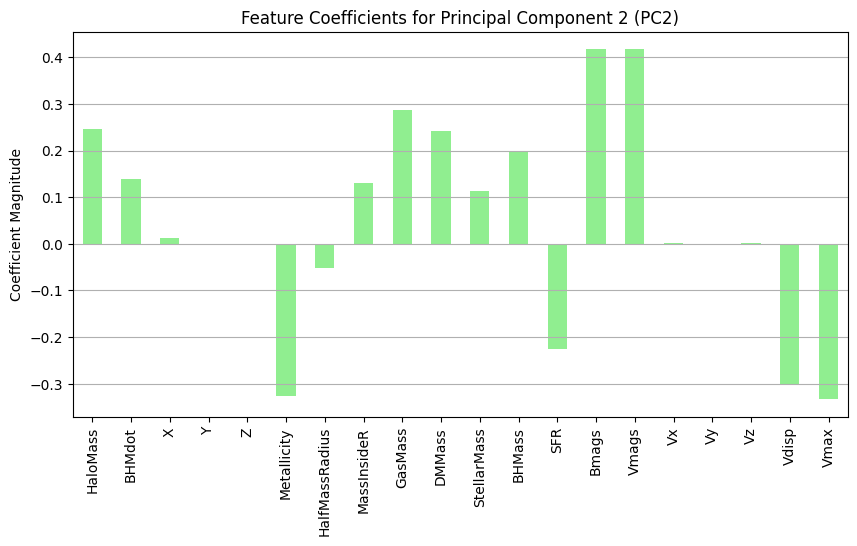

Top 5 contributing features to PC1:
MassInsideR    0.345932
StellarMass    0.337565
BHMass         0.329851
DMMass         0.324389
HaloMass       0.322703
dtype: float64

Least 5 contributing features to PC1:
Vy    0.000083
Vz    0.000148
Z     0.000164
Y     0.000357
Vx    0.000723
dtype: float64

Top 5 contributing features to PC2:
Vmags          0.416771
Bmags          0.416771
Vmax           0.333427
Metallicity    0.326558
Vdisp          0.303473
dtype: float64

Least 5 contributing features to PC2:
Z     0.000126
Vy    0.000248
Y     0.000343
Vx    0.001855
Vz    0.002637
dtype: float64


In [ ]:
# Get PCA component loadings (coefficients)
loadings = pca.components_

# Get feature names
features = df.columns

# Create DataFrames for PC1 and PC2
pc1_loadings = pd.Series(loadings[0], index=features)
pc2_loadings = pd.Series(loadings[1], index=features)

# Bar chart for PC1
plt.figure(figsize=(10,5))
pc1_loadings.plot(kind='bar', color='skyblue')
plt.title('Feature Coefficients for Principal Component 1 (PC1)')
plt.ylabel('Coefficient Magnitude')
plt.grid(axis='y')
plt.show()

# Bar chart for PC2
plt.figure(figsize=(10,5))
pc2_loadings.plot(kind='bar', color='lightgreen')
plt.title('Feature Coefficients for Principal Component 2 (PC2)')
plt.ylabel('Coefficient Magnitude')
plt.grid(axis='y')
plt.show()

# Print out the most and least important features
print("Top 5 contributing features to PC1:")
print(pc1_loadings.abs().sort_values(ascending=False).head())

print("\nLeast 5 contributing features to PC1:")
print(pc1_loadings.abs().sort_values(ascending=True).head())

print("\nTop 5 contributing features to PC2:")
print(pc2_loadings.abs().sort_values(ascending=False).head())

print("\nLeast 5 contributing features to PC2:")
print(pc2_loadings.abs().sort_values(ascending=True).head())

# Q9. (1 point)
Create a scatter plot of PC1 and PC2 just as before, but color the points based on the most important feature in PC1 (the highest bar from the last question). Does this feature correlate with PC1/PC2 or both?

Most important feature in PC1: MassInsideR


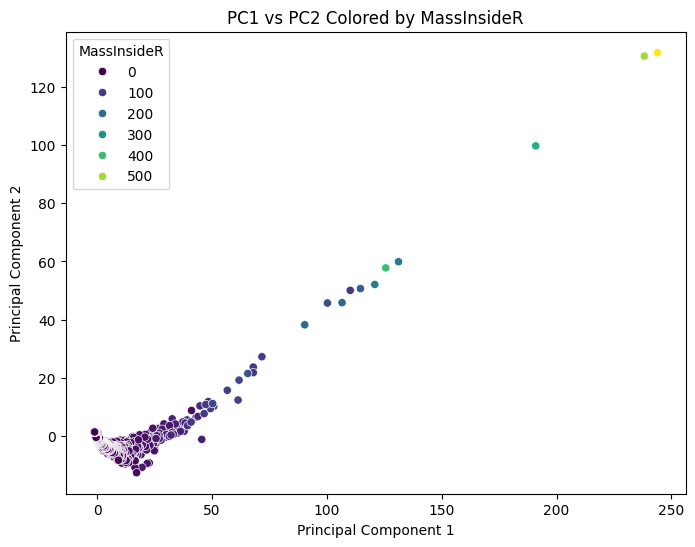

Correlation between MassInsideR and PC1: 0.944
Correlation between MassInsideR and PC2: 0.229


In [ ]:
# Identify the most important feature in PC1
most_important_pc1 = pc1_loadings.abs().idxmax()
print("Most important feature in PC1:", most_important_pc1)

# Transform data into PCA space
pca_data = pca.transform(df_scaled)

# Create a DataFrame for plotting
pca_df = pd.DataFrame({
    'PC1': pca_data[:, 0],
    'PC2': pca_data[:, 1],
    most_important_pc1: df[most_important_pc1]
})

# Simple scatter plot with coloring by the most important feature
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue=most_important_pc1,
    palette='viridis'
)
plt.title(f'PC1 vs PC2 Colored by {most_important_pc1}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title=most_important_pc1)
plt.show()

# Compute correlation of MassInsideR with PC1 and PC2
corr_pc1 = np.corrcoef(pca_df['PC1'], pca_df[most_important_pc1])[0, 1]
corr_pc2 = np.corrcoef(pca_df['PC2'], pca_df[most_important_pc1])[0, 1]

print(f"Correlation between {most_important_pc1} and PC1: {corr_pc1:.3f}")
print(f"Correlation between {most_important_pc1} and PC2: {corr_pc2:.3f}")



The scatter plot shows that the color gradient of MassInsideR changes primarily along the PC1 axis but also slightly along PC2.
Numerically, MassInsideR has a strong positive correlation with PC1 and a weaker correlation with PC2.
This means MassInsideR is mainly represented by PC1, with a smaller contribution from PC2.